# Подготовка

In [1]:
import sklearn.tree as tree
import sklearn.model_selection as skmodel
import sklearn.metrics as metrics
import sklearn.ensemble as ensemble
import sklearn.linear_model as linear
import sklearn.neighbors as neighbors
import sklearn.model_selection as model
import xgboost as xgb
import imblearn.over_sampling as oversampling
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections as cl

In [2]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]
data_regression

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
data_classification = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_classification.drop("Win_Probability", axis=1)
Y_class = data_classification.loc[:, "Win_Probability"]
X_class, Y_class = oversampling.SMOTE().fit_resample(X_class, Y_class)
X_class.shape, Y_class.shape

((283935, 2), (283935,))

In [4]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = skmodel.train_test_split(X_reg, Y_reg, random_state=14)
X_class_train, X_class_test, Y_class_train, Y_class_test = skmodel.train_test_split(X_class, Y_class, random_state=14)

# Задание 1

In [5]:
tree_regression_model = tree.DecisionTreeRegressor(max_depth=5).fit(X_reg_train, Y_reg_train)

tree_regression_prediction = tree_regression_model.predict(X_reg_test)

In [6]:
print(metrics.mean_absolute_error(Y_reg_test, tree_regression_prediction),
      metrics.r2_score(Y_reg_test, tree_regression_prediction),
      sep="\n")

646.1498831943304
0.9130261302011216


In [7]:
print(tree.export_text(tree_regression_model))

|--- feature_0 <= 1.00
|   |--- feature_5 <= 5.54
|   |   |--- feature_5 <= 4.99
|   |   |   |--- feature_4 <= 4.62
|   |   |   |   |--- feature_4 <= 4.30
|   |   |   |   |   |--- value: [579.36]
|   |   |   |   |--- feature_4 >  4.30
|   |   |   |   |   |--- value: [740.70]
|   |   |   |--- feature_4 >  4.62
|   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |--- value: [939.55]
|   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |--- value: [1194.64]
|   |   |--- feature_5 >  4.99
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- value: [1869.18]
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- value: [1441.46]
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- feature_0 <= 0.64
|   |   |   |   |   |--- value: [1185.74]
|   |   |   |   |--- feature_0 >  0.64
|   |   |   |   |   |--- value: [1877.07]
|   |--- feature_5 >  5.54
|   |   |--- feature_0 <= 0.88
|   |   |   |--- feature_5 <= 5.72
|   

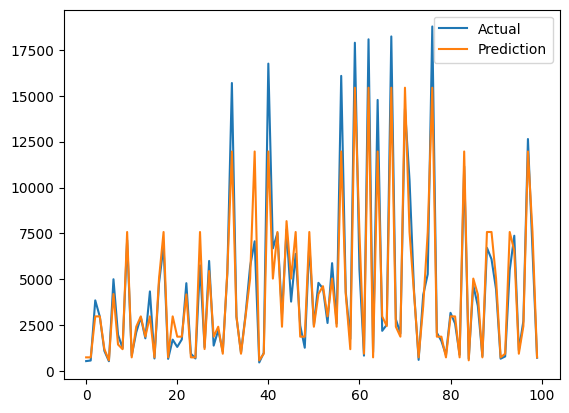

In [8]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(tree_regression_prediction[:100], label="Prediction");
plt.legend();

In [9]:
tree_classification_model = tree.DecisionTreeClassifier().fit(X_class_train, Y_class_train)

tree_classification_prediction = tree_classification_model.predict(X_class_test)

In [10]:
print(metrics.classification_report(Y_class_test.to_numpy(), tree_classification_prediction))

              precision    recall  f1-score   support

          -1       0.81      0.82      0.81     23849
           0       0.88      0.85      0.86     23611
           1       0.82      0.83      0.82     23524

    accuracy                           0.83     70984
   macro avg       0.83      0.83      0.83     70984
weighted avg       0.83      0.83      0.83     70984



In [11]:
print(tree.export_text(tree_classification_model))

|--- feature_0 <= 5344.50
|   |--- feature_0 <= 4980.50
|   |   |--- feature_0 <= 12.50
|   |   |   |--- feature_0 <= 10.50
|   |   |   |   |--- feature_0 <= 5.50
|   |   |   |   |   |--- feature_1 <= 4176.50
|   |   |   |   |   |   |--- feature_1 <= 3523.50
|   |   |   |   |   |   |   |--- feature_1 <= 3387.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 2234.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1858.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 805.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  805.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_1 >  1858.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2144.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2144.50
|   |   |   

# Задание 2

## Bagging

In [12]:
bagging_regression_model = ensemble.BaggingRegressor().fit(X_reg_train, Y_reg_train)

bagging_regression_prediction = bagging_regression_model.predict(X_reg_test)

In [13]:
print(metrics.mean_absolute_error(Y_reg_test, bagging_regression_prediction),
      metrics.r2_score(Y_reg_test, bagging_regression_prediction),
      sep="\n")

288.6508641700655
0.9782880423964492


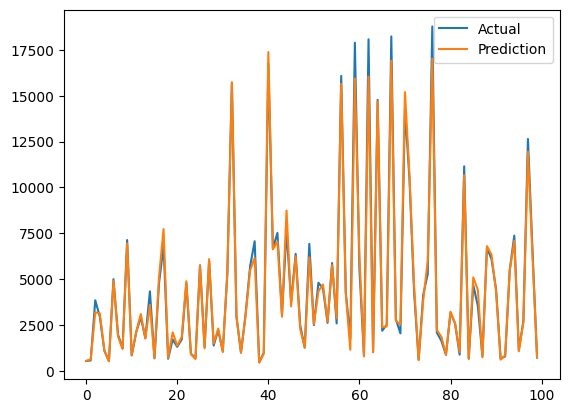

In [14]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(bagging_regression_prediction[:100], label="Prediction");
plt.legend();

In [15]:
bagging_classification_model = ensemble.BaggingClassifier().fit(X_class_train, Y_class_train)

bagging_classification_prediction = bagging_classification_model.predict(X_class_test)

In [16]:
print(metrics.classification_report(Y_class_test, bagging_classification_prediction))

              precision    recall  f1-score   support

          -1       0.79      0.83      0.81     23849
           0       0.88      0.87      0.87     23611
           1       0.82      0.80      0.81     23524

    accuracy                           0.83     70984
   macro avg       0.83      0.83      0.83     70984
weighted avg       0.83      0.83      0.83     70984



## Boosting

In [17]:
boosting_regression_model = ensemble.GradientBoostingRegressor().fit(X_reg_train, Y_reg_train)

boosting_regression_prediction = boosting_regression_model.predict(X_reg_test)

In [18]:
print(metrics.mean_absolute_error(Y_reg_test, boosting_regression_prediction),
      metrics.r2_score(Y_reg_test, boosting_regression_prediction),
      sep="\n")

408.3880149484457
0.9659009333441947


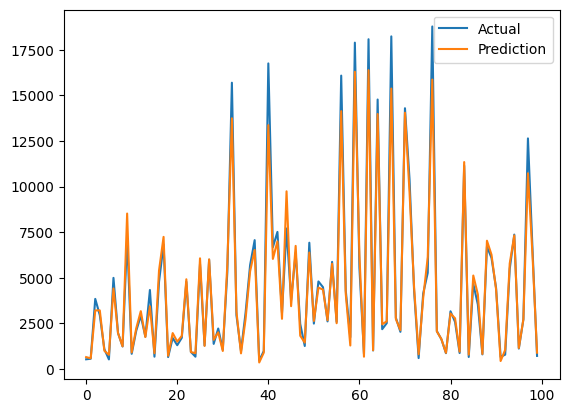

In [19]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(boosting_regression_prediction[:100], label="Prediction");
plt.legend();

In [20]:
boosting_classification_model = ensemble.GradientBoostingClassifier().fit(X_class_train, Y_class_train)

boosting_classification_prediction = boosting_classification_model.predict(X_class_test)

In [21]:
print(metrics.classification_report(Y_class_test, bagging_classification_prediction))

              precision    recall  f1-score   support

          -1       0.79      0.83      0.81     23849
           0       0.88      0.87      0.87     23611
           1       0.82      0.80      0.81     23524

    accuracy                           0.83     70984
   macro avg       0.83      0.83      0.83     70984
weighted avg       0.83      0.83      0.83     70984



## Stacking

In [22]:
stacking_regression_model = ensemble.StackingRegressor(cv=3, estimators=[("ridge", linear.RidgeCV()), ("tree", tree.DecisionTreeRegressor())]).fit(X_reg_train, Y_reg_train)

stacking_regression_prediction = stacking_regression_model.predict(X_reg_test)

In [23]:
print(metrics.mean_absolute_error(Y_reg_test, bagging_regression_prediction),
      metrics.r2_score(Y_reg_test, bagging_regression_prediction),
      sep="\n")

288.6508641700655
0.9782880423964492


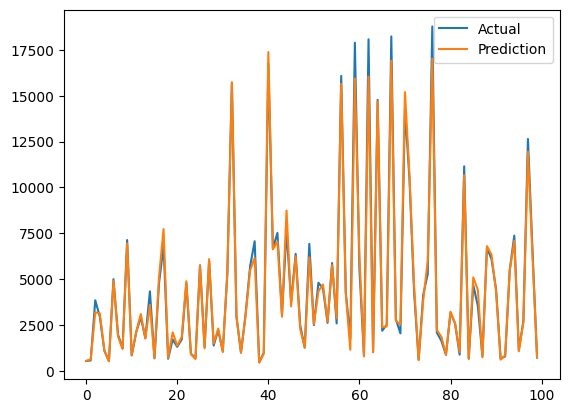

In [24]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(bagging_regression_prediction[:100], label="Prediction");
plt.legend();

In [25]:
stacking_classification_model = ensemble.StackingClassifier(cv=3, estimators=[("neighbors", neighbors.KNeighborsClassifier(weights="distance")), ("tree", tree.DecisionTreeClassifier())]).fit(X_class_train, Y_class_train)

stacking_classification_prediction = stacking_classification_model.predict(X_class_test)

In [26]:
print(metrics.classification_report(Y_class_test, stacking_classification_prediction))

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83     23849
           0       0.90      0.89      0.89     23611
           1       0.83      0.83      0.83     23524

    accuracy                           0.85     70984
   macro avg       0.85      0.85      0.85     70984
weighted avg       0.85      0.85      0.85     70984



# Задание 3

In [35]:
tree_method: str = {"0": "hist", "1": "gpu_hist"}.get(input())
xgb_regression_model = model.RandomizedSearchCV(xgb.XGBRegressor(), {"max_depth": np.arange(2, 20, 1), "n_estimators": np.arange(15, 100, 5), "tree_method": [tree_method]}, cv=3).fit(X_reg_train, Y_reg_train)

xgb_regression_prediction = xgb_regression_model.predict(X_reg_test)
xgb_regression_model.best_params_

{'tree_method': 'hist', 'n_estimators': 45, 'max_depth': 11}

In [36]:
print(metrics.mean_absolute_error(Y_reg_test, xgb_regression_prediction),
      metrics.r2_score(Y_reg_test, xgb_regression_prediction),
      sep="\n")

285.78667595070914
0.9780060525657772


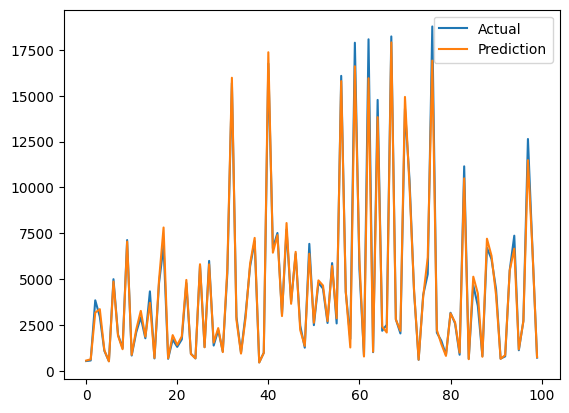

In [37]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(xgb_regression_prediction[:100], label="Prediction");
plt.legend();

In [38]:
Y_class_train_relabeled = Y_class_train.apply(lambda x: x + 1)
xgb_classification_model = model.RandomizedSearchCV(xgb.XGBClassifier(), {"max_depth": np.arange(2, 20, 1), "n_estimators": np.arange(15, 100, 5), "tree_method": [tree_method]}, cv=3).fit(X_class_train, Y_class_train_relabeled)

xgb_classification_prediction = xgb_classification_model.predict(X_class_test)
xgb_classification_model.best_params_

{'tree_method': 'hist', 'n_estimators': 70, 'max_depth': 16}

In [39]:
print(metrics.classification_report(Y_class_test, xgb_classification_prediction - 1))

              precision    recall  f1-score   support

          -1       0.62      0.58      0.60     23849
           0       0.70      0.79      0.75     23611
           1       0.61      0.57      0.59     23524

    accuracy                           0.65     70984
   macro avg       0.64      0.65      0.64     70984
weighted avg       0.64      0.65      0.64     70984



In [42]:
matrix_train = xgb.DMatrix(X_class_train, Y_class_train_relabeled)
matrix_test = xgb.DMatrix(X_class_test, Y_class_test.apply(lambda x: x + 1))

iterations: int = 8000 if tree_method == "gpu_hist" else 800
matrix_booster = xgb.train({"objective": "multi:softmax", "num_class": 3, "tree_method": tree_method}, matrix_train, iterations, evals=[(matrix_test, "test")])

[0]	test-mlogloss:1.09622
[1]	test-mlogloss:1.09436
[2]	test-mlogloss:1.09260
[3]	test-mlogloss:1.09140
[4]	test-mlogloss:1.09038
[5]	test-mlogloss:1.08903
[6]	test-mlogloss:1.08768
[7]	test-mlogloss:1.08659
[8]	test-mlogloss:1.08565
[9]	test-mlogloss:1.08462
[10]	test-mlogloss:1.08364
[11]	test-mlogloss:1.08275
[12]	test-mlogloss:1.08176
[13]	test-mlogloss:1.08098
[14]	test-mlogloss:1.08031
[15]	test-mlogloss:1.07934
[16]	test-mlogloss:1.07835
[17]	test-mlogloss:1.07719
[18]	test-mlogloss:1.07643
[19]	test-mlogloss:1.07577
[20]	test-mlogloss:1.07502
[21]	test-mlogloss:1.07444
[22]	test-mlogloss:1.07358
[23]	test-mlogloss:1.07288
[24]	test-mlogloss:1.07211
[25]	test-mlogloss:1.07140
[26]	test-mlogloss:1.07057
[27]	test-mlogloss:1.06984
[28]	test-mlogloss:1.06906
[29]	test-mlogloss:1.06837
[30]	test-mlogloss:1.06784
[31]	test-mlogloss:1.06690
[32]	test-mlogloss:1.06619
[33]	test-mlogloss:1.06523
[34]	test-mlogloss:1.06452
[35]	test-mlogloss:1.06372
[36]	test-mlogloss:1.06299
[37]	test-m

In [43]:
matrix_prediction = matrix_booster.predict(matrix_test)

print(metrics.classification_report(Y_class_test, matrix_prediction - 1))

              precision    recall  f1-score   support

          -1       0.56      0.52      0.54     23849
           0       0.64      0.72      0.68     23611
           1       0.55      0.52      0.53     23524

    accuracy                           0.59     70984
   macro avg       0.58      0.59      0.58     70984
weighted avg       0.58      0.59      0.58     70984

